# Gender Bias Analysis in Word Embeddings

GenAI (GPT-5, Gemini) has been used to complete the assignment as a support. All the assignment has been done by Roberto Punzano, Victòria Ferrando, and Paula Jiménez.

DATASET

Habilitats professionals:
- enginyós
- analític
- estratègic
- competitiu
- experimentat
- qualificat

Caràcter:
- observador
- carismàtic
- ambiciós
- dedicat
- assenyat
- entusiàstic

Aspecte físic:
- guapo
- glamurós
- polit
- fotogènic
- atractiu
- sofisticat

Habilitats socials/interpersonals:
- compassiu
- atent
- afectuós
- empàtic
- solidari
- càlid

Creativitat:
- innovador
- imaginatiu
- creatiu
- artístic
- inspirat
- somiador

In [ ]:
# installing needed packages
!pip install fasttext
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-3.0.1-py3-none-any.whl.metadata (10.0 kB)
Using cached pybind11-3.0.1-py3-none-any.whl (293 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp312-cp312-linux_x86_64.whl size=4498211 sha256=b79455486c201192181e41bb4c1dac0fd663f69df07be049da50489de98fff58
  Stored in directory: /root/.cache/pip/wheels/20/27/95/a7baf1b435f1cbde017cabdf1e9688526d2b0e929255a359c6
Successfully built fasttext
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 51.0 MB/s eta 0:00:00


In [ ]:
# LOADING FASTTEXT CATALAN EMBEDDINGS
import os
import gensim
# loading embeddings from class notebooks but in catalan
from IPython.utils import io
ft_file = 'cc.ca.300.vec.gz'
if not os.path.exists(ft_file):
  print('Downloading Distributional Semantics model ...')
  with io.capture_output() as captured:
    !wget 'https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ca.300.vec.gz' ;

print('Loading Distributional Semantic Model ...')
# Loading word vectors limiting to the first 100K words, using gensim
ds_model = gensim.models.KeyedVectors.load_word2vec_format(ft_file, limit = 100000)
print('Done!')


Loading Distributional Semantic Model ...
Done!


In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/dramaqueenvee/Assignment9-genderbias/refs/heads/main/genderbias_utf8.csv"
df = pd.read_csv(url, names=['adjectius', 'pronoms'], sep=',')

groups = {"Professional Abilities": ["enginyós", "enginyosa",
        "analític", "analítica",
        "estratègic", "estratègica",
        "competitiu", "competitiva",
        "experimentat", "experimentada",
        "qualificat", "qualificada"],

    "Personality": ["observador", "observadora",
        "carismàtic", "carismàtica",
        "ambiciós", "ambiciosa",
        "dedicat", "dedicada",
        "assenyat", "assenyada",
        "entusiàstic", "entusiàstica"],

    "Physical aspect": ["guapo", "guapa",
        "glamurós", "glamurosa",
        "polit", "polida",
        "fotogènic", "fotogènica",
        "atractiu", "atractiva",
        "sofisticat", "sofisticada"],

    "Interpersonal and social abilities": ["compassiu", "compassiva",
        "atent", "atenta",
        "afectuós", "afectuosa",
        "empàtic", "empàtica",
        "solidari", "solidària",
        "càlid", "càlida"],

    "Creativity": ["innovador", "innovadora",
        "imaginatiu", "imaginativa",
        "creatiu", "creativa",
        "artístic", "artística",
        "inspirat", "inspirada",
        "somiador", "somiadora"]}

def assign_group(adj):
    for group, llista in groups.items():
        if adj in llista:
            return group
    return "No group"

df["group"] = df["adjectius"].apply(assign_group)

print(df.head(20))


        adjectius pronoms                   group
0        enginyós     ell  Professional Abilities
1       enginyosa    ella  Professional Abilities
2        analític     ell  Professional Abilities
3       analítica    ella  Professional Abilities
4      estratègic     ell  Professional Abilities
5     estratègica    ella  Professional Abilities
6      competitiu     ell  Professional Abilities
7     competitiva    ella  Professional Abilities
8    experimentat     ell  Professional Abilities
9   experimentada    ella  Professional Abilities
10     qualificat     ell  Professional Abilities
11    qualificada    ella  Professional Abilities
12     observador     ell             Personality
13    observadora    ella             Personality
14     carismàtic     ell             Personality
15    carismàtica    ella             Personality
16       ambiciós     ell             Personality
17      ambiciosa    ella             Personality
18        dedicat     ell             Personality


In [ ]:
# checking cosine similarities per pairs (each adj with its pronoun, masc or fem)
similarities = []

for idx, row in df.iterrows():
    adj = row["adjectius"]      # ex. "enginyós"
    pron = row["pronoms"]       # ex. "ell"

    # check if both words exist in the model
    if adj in ds_model and pron in ds_model:
        sim = ds_model.similarity(adj, pron)
    else:
        sim = None  # or np.nan
    similarities.append(sim)

df["similarity"] = similarities
print(df)


        adjectius pronoms                               group  similarity
0        enginyós     ell              Professional Abilities    0.347539
1       enginyosa    ella              Professional Abilities    0.334940
2        analític     ell              Professional Abilities    0.237492
3       analítica    ella              Professional Abilities    0.286641
4      estratègic     ell              Professional Abilities    0.217057
5     estratègica    ella              Professional Abilities    0.223846
6      competitiu     ell              Professional Abilities    0.284960
7     competitiva    ella              Professional Abilities    0.296135
8    experimentat     ell              Professional Abilities    0.378710
9   experimentada    ella              Professional Abilities    0.358023
10     qualificat     ell              Professional Abilities    0.280601
11    qualificada    ella              Professional Abilities    0.243055
12     observador     ell             

In [ ]:
#QUANTITATIVE ANALYSIS

# Step 0: Import libraries
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

# Step 1: Load the CSV
df = pd.read_csv(url, names=["adjectiu", "pronoms"])
df["group"] = df["adjectiu"].apply(assign_group)
print("Loaded df:")
print(df.head(6))

# Step 2: Pair masculine and feminine adjectives
# Every masculine row is followed by its feminine pair
adj_masc = df.iloc[::2]["adjectiu"].reset_index(drop=True)
adj_fem  = df.iloc[1::2]["adjectiu"].reset_index(drop=True)

df_pairs = pd.DataFrame({"adj_masc": adj_masc, "adj_fem": adj_fem})
print("\nPaired adjectives:")
print(df_pairs.head())

df_pairs["group_masc"] = df.iloc[::2]["group"].reset_index(drop=True)
df_pairs["group_fem"]  = df.iloc[1::2]["group"].reset_index(drop=True)
df_pairs["group"] = df_pairs["group_masc"]

# Step 3: Define a safe similarity function
def safe_sim(a, b):
    """Compute cosine similarity between two words if both exist in the model."""
    if (a in ds_model) and (b in ds_model):
        return ds_model.similarity(a, b)
    return np.nan

# Step 4: Compute similarities
# Similarity of masculine adjectives to 'ell' and feminine to 'ella'
df_pairs["sim_masc_ell"] = df_pairs["adj_masc"].apply(lambda x: safe_sim(x, "ell"))
df_pairs["sim_fem_ella"] = df_pairs["adj_fem"].apply(lambda x: safe_sim(x, "ella"))

# Similarity between masculine and feminine adjective embeddings
df_pairs["sim_adj_pair"] = df_pairs.apply(lambda r: safe_sim(r["adj_masc"], r["adj_fem"]), axis=1)

# Drop any pairs with missing similarities
df_clean = df_pairs.dropna(subset=["sim_masc_ell", "sim_fem_ella"]).copy()
print("\nCleaned pairs with similarities:")
print(df_clean.head())

# Step 5: Spearman correlation
spearman_corr, p_value = spearmanr(df_clean["sim_masc_ell"], df_clean["sim_fem_ella"])
print("\n--- RESULTS ---")
print(f"Spearman correlation (adj masc → 'ell' vs adj fem → 'ella'): {spearman_corr}")
print(f"P-value: {p_value}")

# Step 6: Compute bias score for visualization / outliers
# Bias = masculine-pronoun similarity minus feminine-pronoun similarity
df_clean["bias_score"] = df_clean["sim_masc_ell"] - df_clean["sim_fem_ella"]

# Show top biased adjectives
print("\nTop positive bias (more associated with 'ell'):")
print(df_clean.sort_values("bias_score", ascending=False).head(5))

print("\nTop negative bias (more associated with 'ella'):")
print(df_clean.sort_values("bias_score", ascending=True).head(5))


Loaded df:
      adjectiu pronoms                   group
0     enginyós     ell  Professional Abilities
1    enginyosa    ella  Professional Abilities
2     analític     ell  Professional Abilities
3    analítica    ella  Professional Abilities
4   estratègic     ell  Professional Abilities
5  estratègica    ella  Professional Abilities

Paired adjectives:
       adj_masc        adj_fem
0      enginyós      enginyosa
1      analític      analítica
2    estratègic    estratègica
3    competitiu    competitiva
4  experimentat  experimentada

Cleaned pairs with similarities:
       adj_masc        adj_fem              group_masc  \
0      enginyós      enginyosa  Professional Abilities   
1      analític      analítica  Professional Abilities   
2    estratègic    estratègica  Professional Abilities   
3    competitiu    competitiva  Professional Abilities   
4  experimentat  experimentada  Professional Abilities   

                group_fem                   group  sim_masc_ell  sim_fe

In [ ]:
# SUMMARY COSINE SIMILARITIES
# Ensure df_clean has the group column
if "group" not in df_clean.columns and "group" in df_pairs.columns:
    df_clean = df_clean.join(df_pairs[["group"]])

# Columns
cols = ["adj_masc", "adj_fem", "group",
        "sim_masc_ell", "sim_fem_ella", "sim_adj_pair", "bias_score"]

# Top 3 positive and top 3 negative bias
top_pos = df_clean.sort_values("bias_score", ascending=False).head(3)[cols].copy()
top_pos["bias_direction"] = "Positive (more associated with 'ell')"

top_neg = df_clean.sort_values("bias_score", ascending=True).head(3)[cols].copy()
top_neg["bias_direction"] = "Negative (more associated with 'ella')"

summary = pd.concat([top_pos, top_neg], ignore_index=True)

# Round numeric columns for readability
for c in ["sim_masc_ell", "sim_fem_ella", "sim_adj_pair", "bias_score"]:
    summary[c] = summary[c].round(3)

# Show as a table
print("\n=== Bias summary (Top 3 Positive & Top 3 Negative) ===")
print(summary.to_markdown(index=False))

# Export to CSV
summary.to_csv("bias_summary.csv", index=False, encoding="utf-8")
print("\nSaved 'bias_summary.csv' to your working directory.")
summary.to_excel("bias_summary.xlsx", index=False)



=== Bias summary (Top 3 Positive & Top 3 Negative) ===
| adj_masc   | adj_fem     | group                              |   sim_masc_ell |   sim_fem_ella |   sim_adj_pair |   bias_score | bias_direction                         |
|:-----------|:------------|:-----------------------------------|---------------:|---------------:|---------------:|-------------:|:---------------------------------------|
| atent      | atenta      | Interpersonal and social abilities |          0.365 |          0.314 |          0.638 |        0.05  | Positive (more associated with 'ell')  |
| qualificat | qualificada | Professional Abilities             |          0.281 |          0.243 |          0.66  |        0.038 | Positive (more associated with 'ell')  |
| inspirat   | inspirada   | Creativity                         |          0.373 |          0.339 |          0.746 |        0.035 | Positive (more associated with 'ell')  |
| atractiu   | atractiva   | Physical aspect                    |          0.31

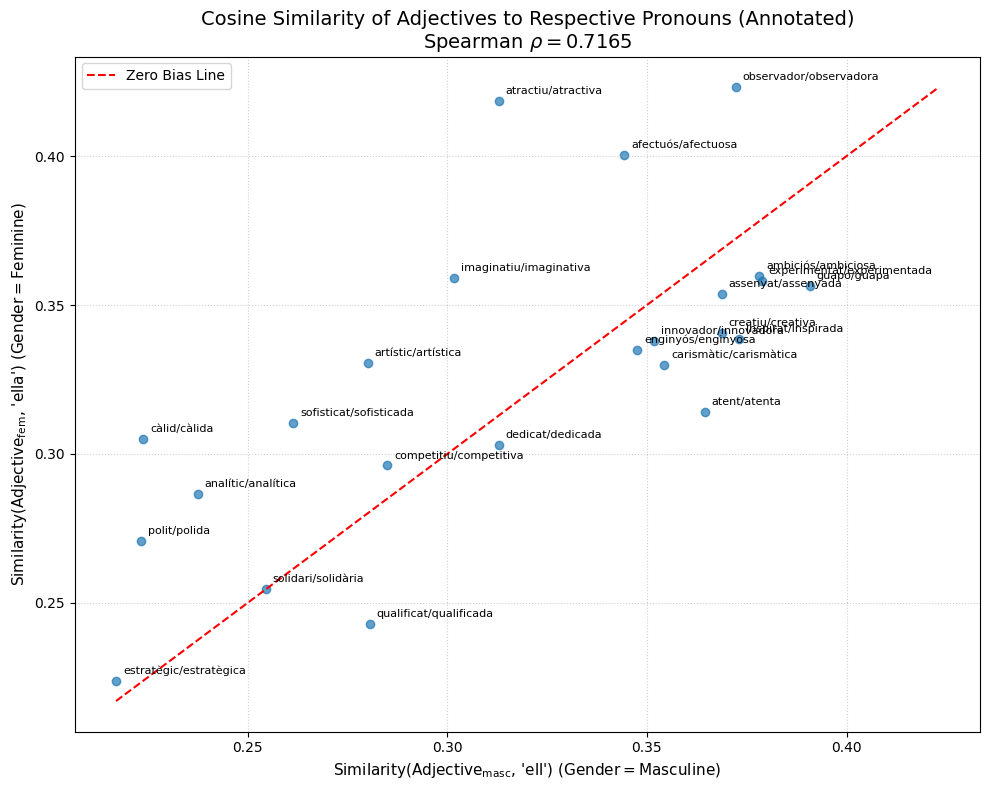

In [ ]:
#QUALITATIVE ANALYSIS
#SCATTER PLOT VISUALIZATION

import matplotlib.pyplot as plt

#create the "atent/atenta" format needed for the labels
df_clean["adj_pair"] = df_clean["adj_masc"] + "/" + df_clean["adj_fem"]


spearman_corr = 0.7165217391304347

plt.figure(figsize=(10, 8))

# 1. Plot the similarity scores
plt.scatter(df_clean["sim_masc_ell"], df_clean["sim_fem_ella"], alpha=0.7)

# 2. Add annotations (labels) for each point
for i in range(len(df_clean)):
    plt.annotate(
        df_clean['adj_pair'].iloc[i],
        (df_clean['sim_masc_ell'].iloc[i], df_clean['sim_fem_ella'].iloc[i]),
        textcoords="offset points",
        xytext=(5, 5),
        ha='left',
        fontsize=8
    )

# 3. Add Title and Labels
plt.title(f"Cosine Similarity of Adjectives to Respective Pronouns (Annotated)\nSpearman $\\rho = {spearman_corr:.4f}$", fontsize=14)
plt.xlabel("Similarity($\\text{Adjective}_\\text{masc}$, $\\text{'ell'}$) ($\\text{Gender} = \\text{Masculine}$)", fontsize=11)
plt.ylabel("Similarity($\\text{Adjective}_\\text{fem}$, $\\text{'ella'}$) ($\\text{Gender} = \\text{Feminine}$)", fontsize=11)

# 4. Add Zero Bias Line
min_val = df_clean[["sim_masc_ell", "sim_fem_ella"]].min().min()
max_val = df_clean[["sim_masc_ell", "sim_fem_ella"]].max().max()
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Zero Bias Line')

plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

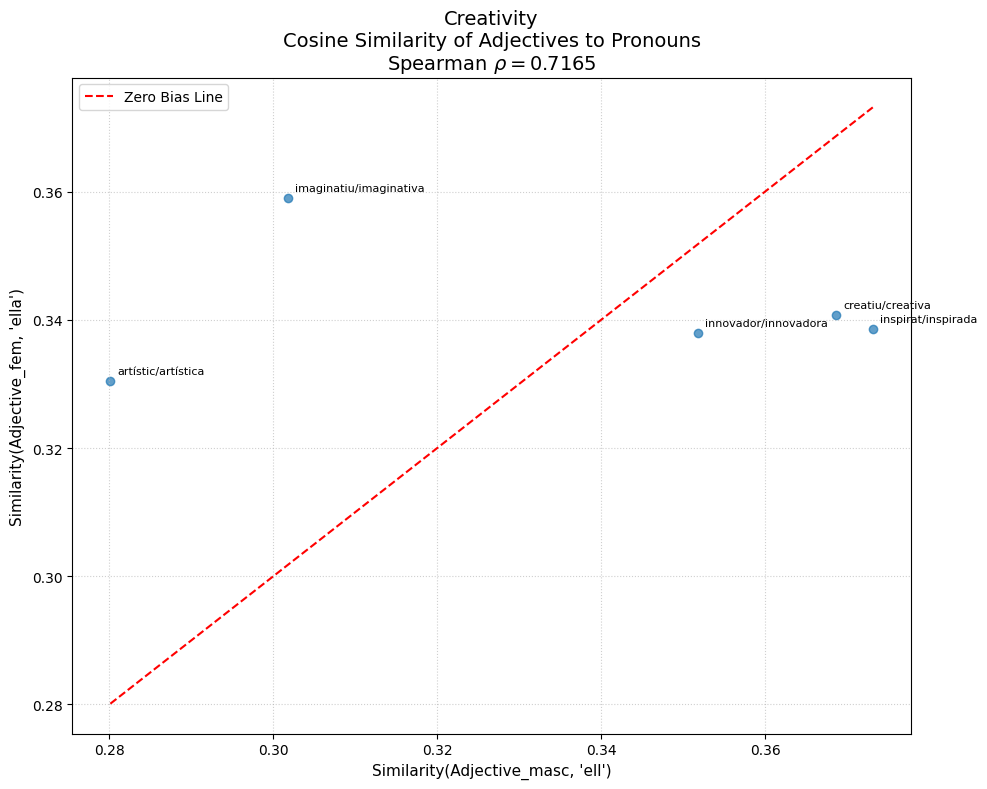

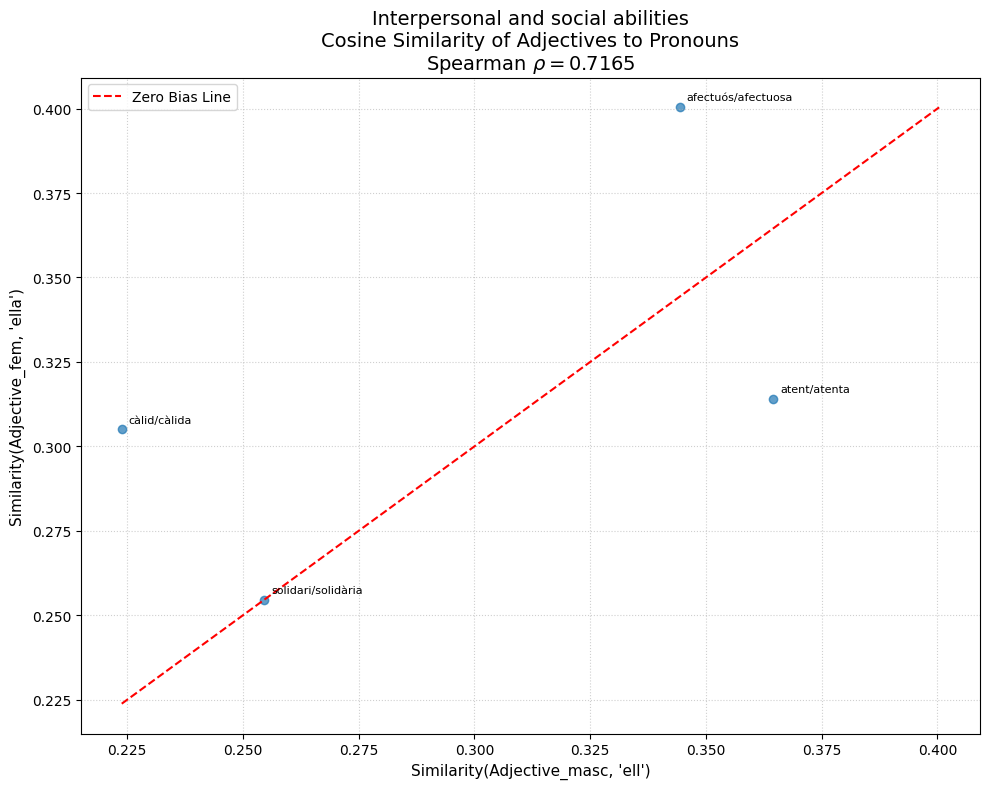

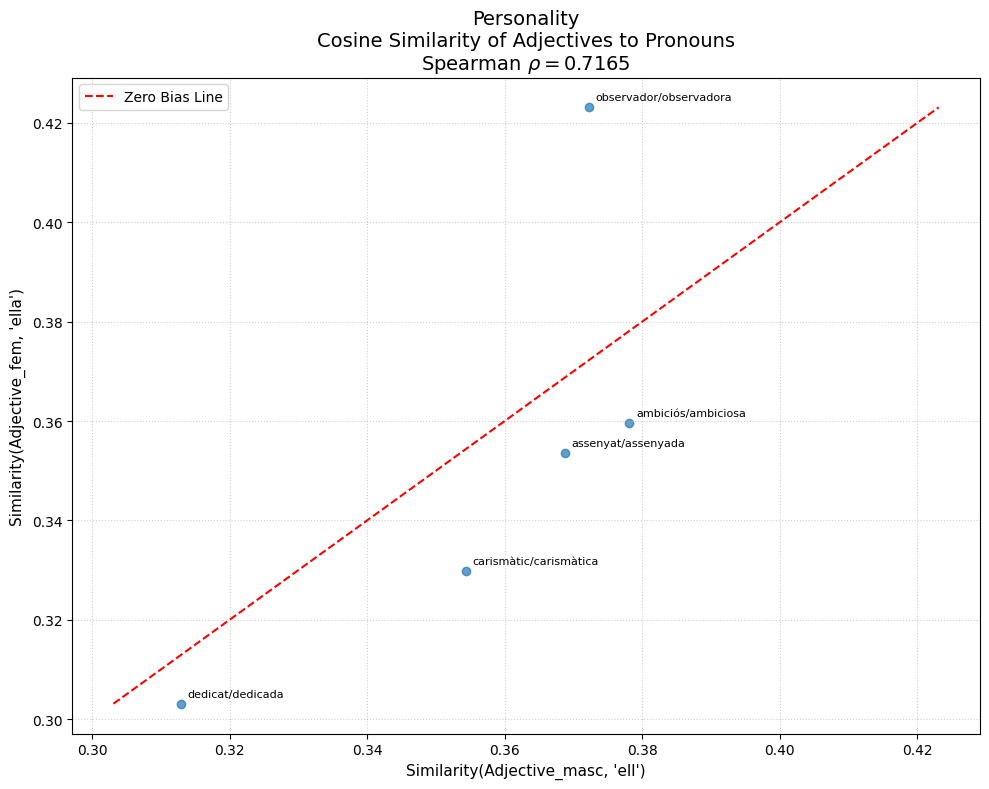

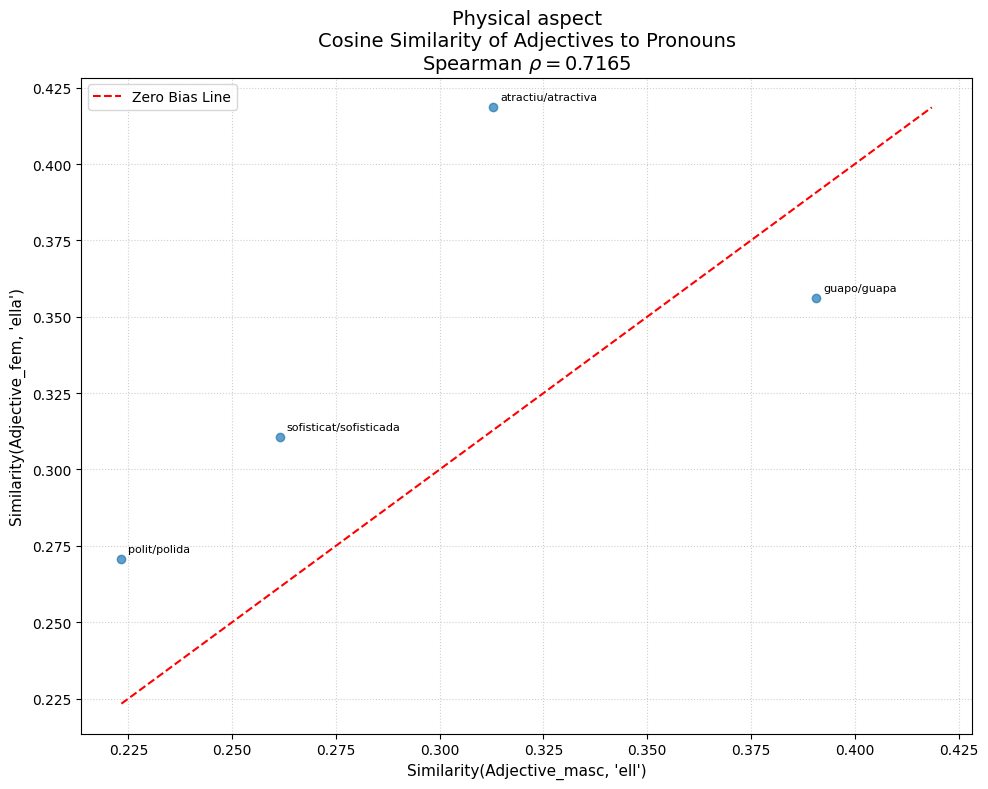

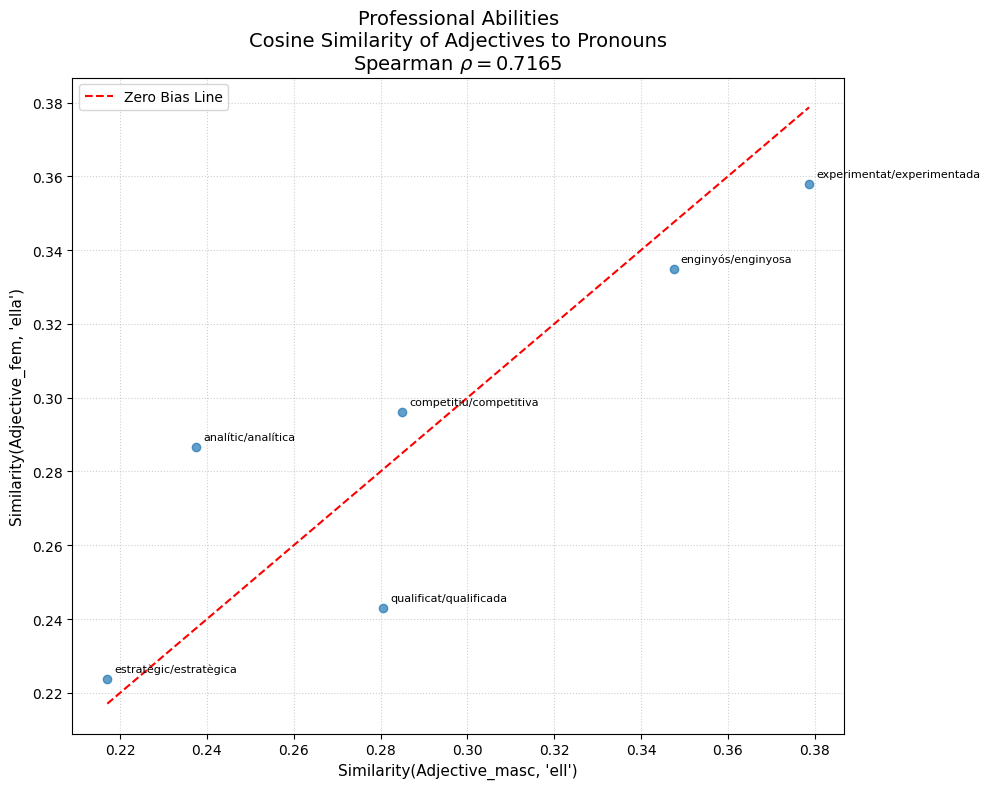

In [ ]:
#1.2 SCATTER PLOT VISUALIZATION PER GROUP OF ADJECTIVES
import matplotlib.pyplot as plt

# We loop over each group
for group_name, df_group in df_clean.groupby("group"):

    # Create the "atent/atenta" format
    df_group["adj_pair"] = df_group["adj_masc"] + "/" + df_group["adj_fem"]

    spearman_corr = 0.7165217391304347

    plt.figure(figsize=(10, 8))

    # Scatter plot
    plt.scatter(df_group["sim_masc_ell"], df_group["sim_fem_ella"], alpha=0.7)

    # Labels for each point
    for i in range(len(df_group)):
        plt.annotate(
            df_group['adj_pair'].iloc[i],
            (df_group['sim_masc_ell'].iloc[i], df_group['sim_fem_ella'].iloc[i]),
            textcoords="offset points",
            xytext=(5, 5),
            ha='left',
            fontsize=8
        )

    # Titles and labels
    plt.title(
        f"{group_name}\nCosine Similarity of Adjectives to Pronouns\nSpearman $\\rho = {spearman_corr:.4f}$",
        fontsize=14
    )
    plt.xlabel("Similarity(Adjective_masc, 'ell')", fontsize=11)
    plt.ylabel("Similarity(Adjective_fem, 'ella')", fontsize=11)

    # Zero Bias Line
    min_val = df_group[["sim_masc_ell", "sim_fem_ella"]].min().min()
    max_val = df_group[["sim_masc_ell", "sim_fem_ella"]].max().max()
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Zero Bias Line')

    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.tight_layout()
    plt.show()

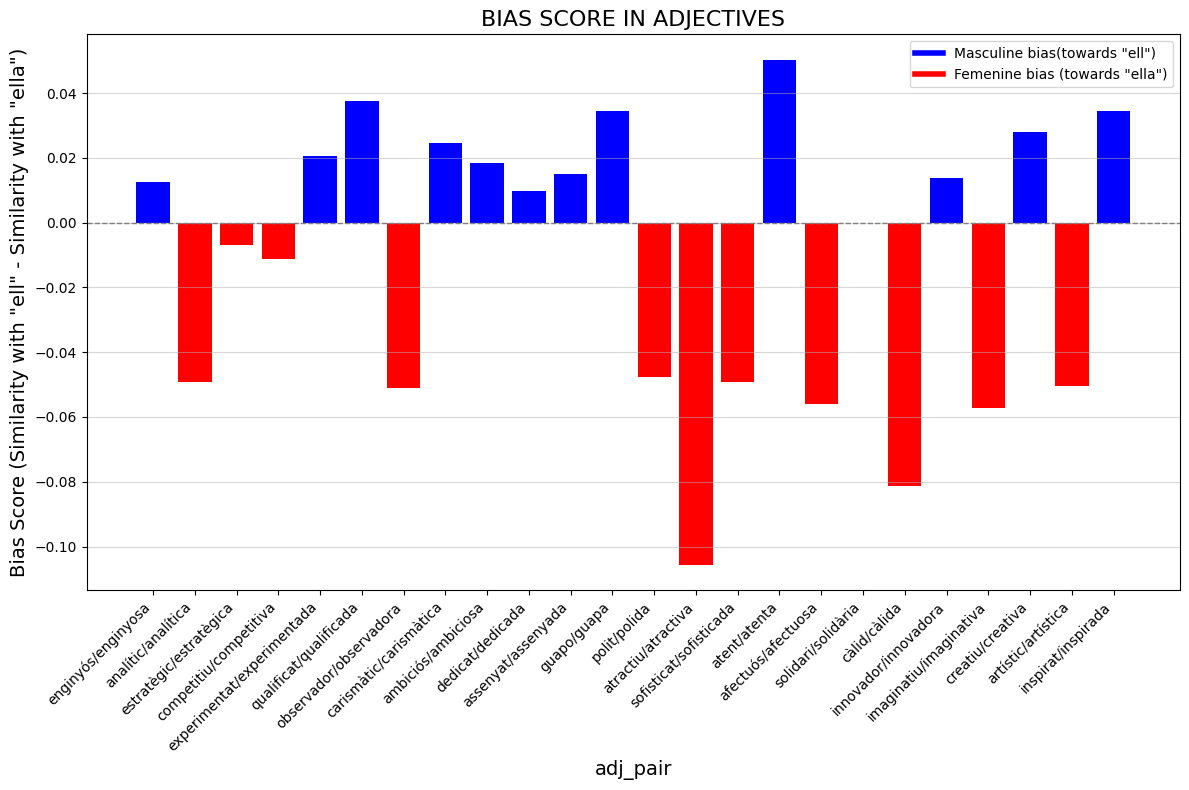

In [ ]:
# 2. BIAS SCORE VISUALIZATION shows in a graph which words lean more towards ell or ella

#add bias score to our df
df_clean["bias_score"] = df_clean["sim_masc_ell"] - df_clean["sim_fem_ella"]
plt.figure(figsize=(12, 8))

# choose colours (blue for ell bias, red for ella bias)
df_clean['colour'] = np.where(df_clean['bias_score'] > 0, 'blue', 'red')

# plot graph
plt.bar(
    df_clean['adj_pair'],
    df_clean['bias_score'],
    color=df_clean['colour']
)

# non-bias line
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

# Tags and title
plt.title('BIAS SCORE IN ADJECTIVES', fontsize=16)
plt.xlabel('adj_pair', fontsize=14)
plt.ylabel('Bias Score (Similarity with "ell" - Similarity with "ella")', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)

# Añadir una leyenda simple para los colores
plt.legend(handles=[
    plt.Line2D([0], [0], color='blue', lw=4, label='Masculine bias(towards "ell")'),
    plt.Line2D([0], [0], color='red', lw=4, label='Femenine bias (towards "ella")')
])

plt.tight_layout() # Ajusta el diseño para que las etiquetas no se corten
plt.show()

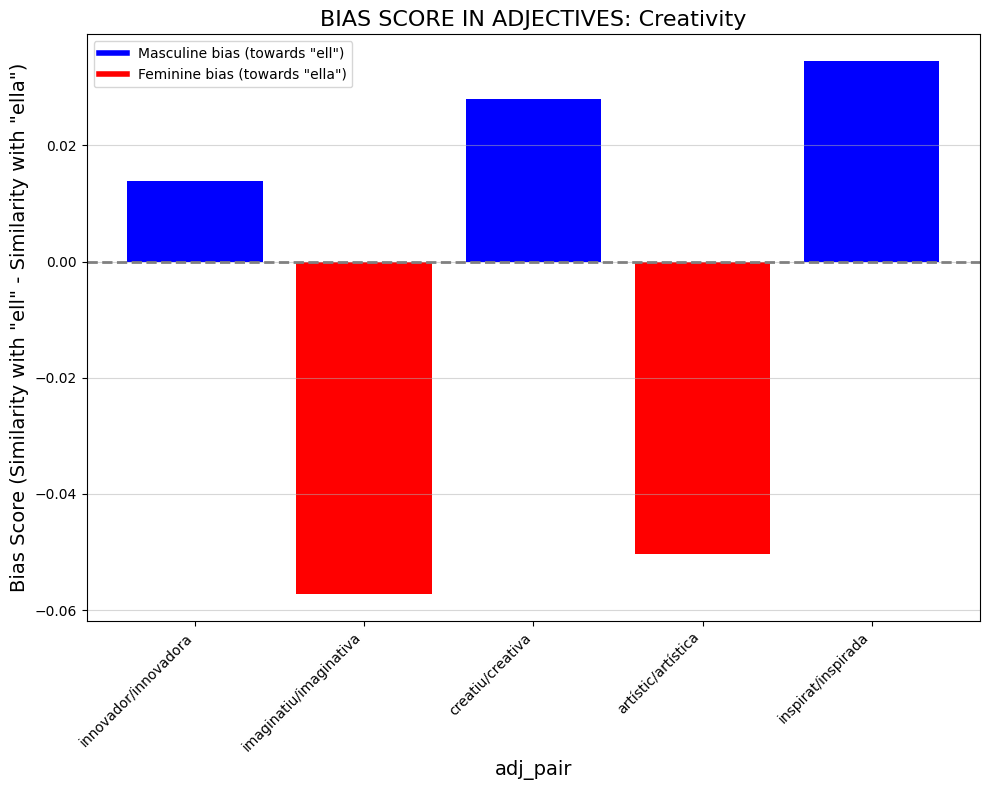

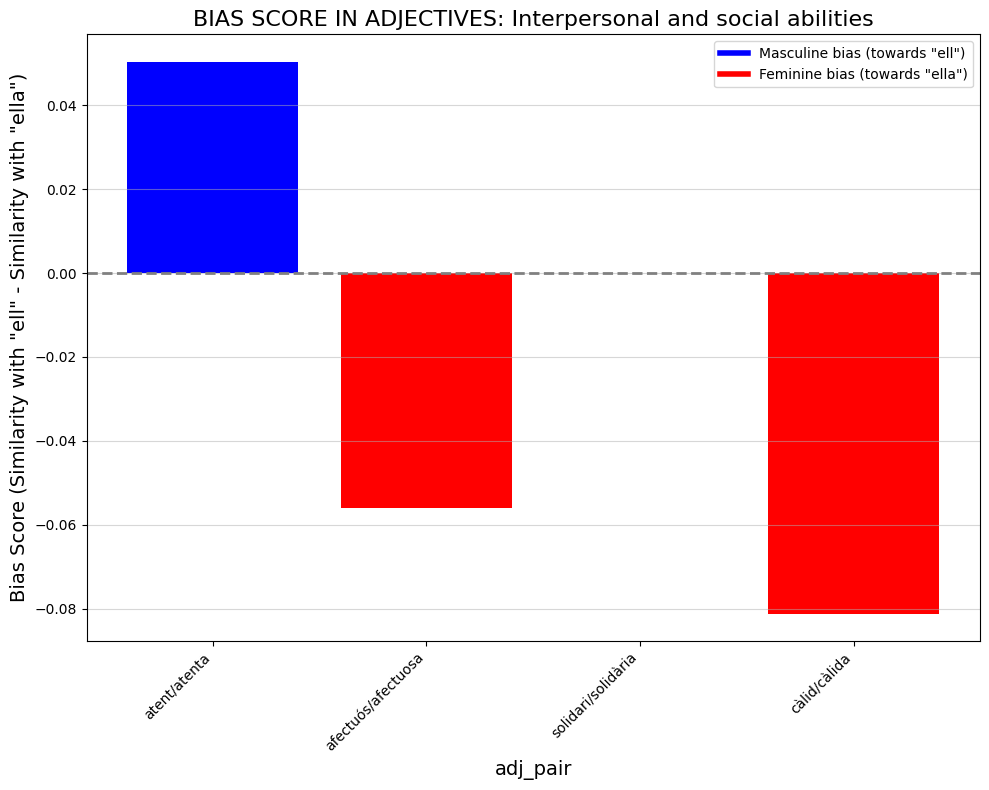

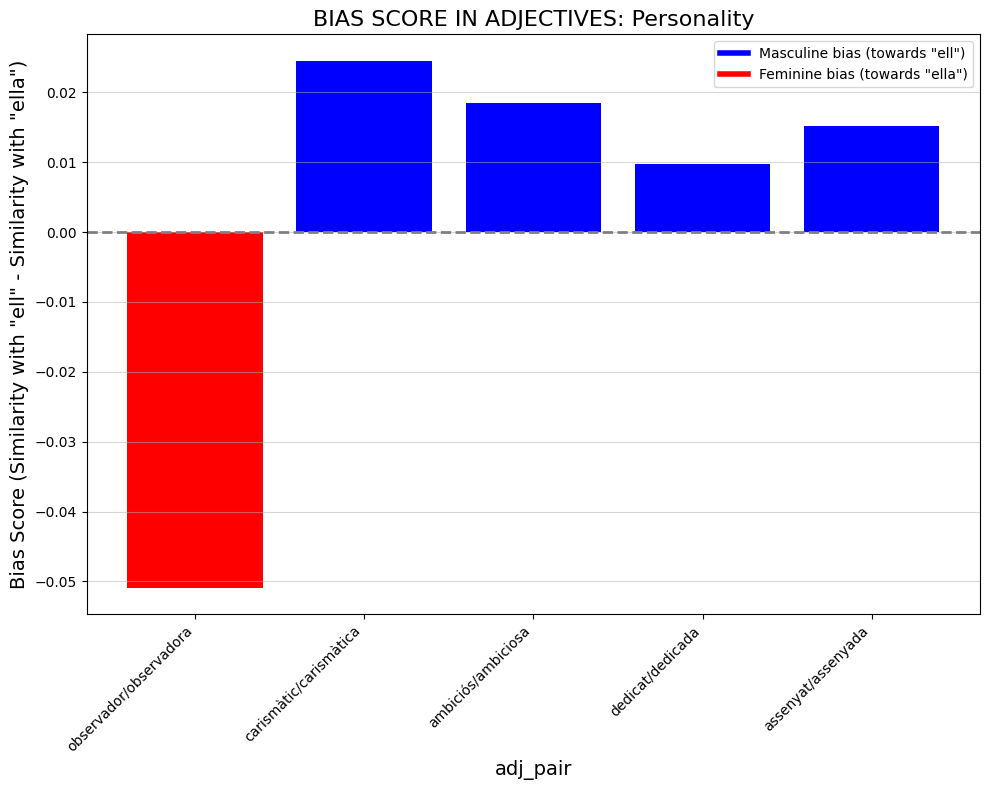

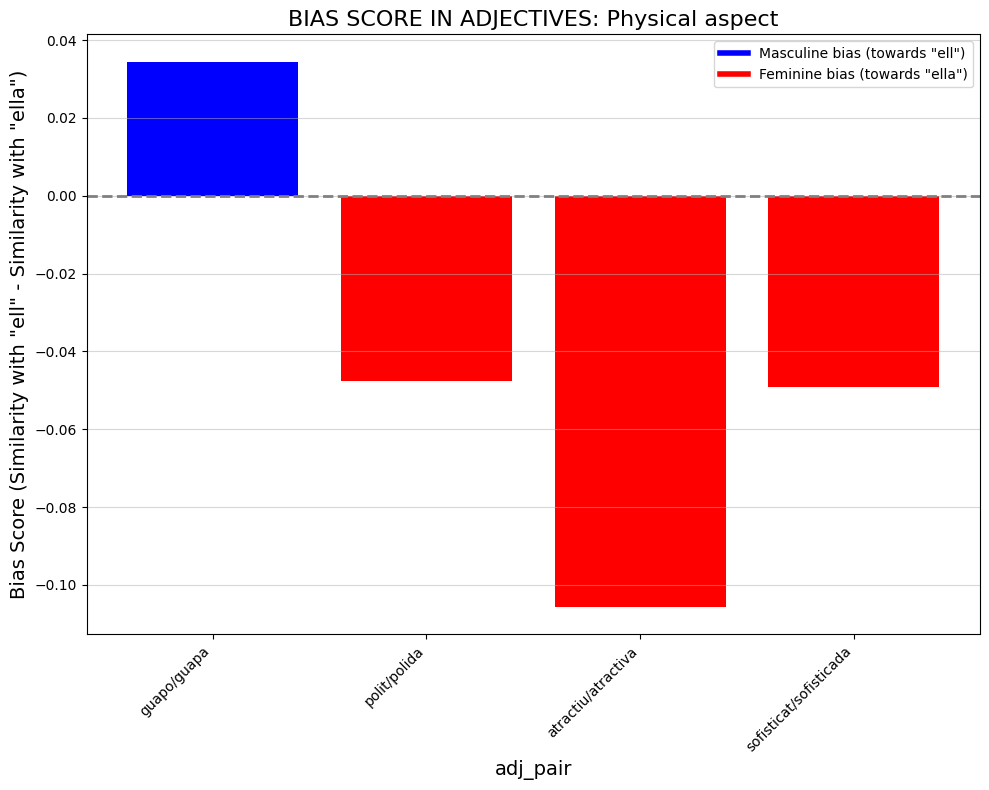

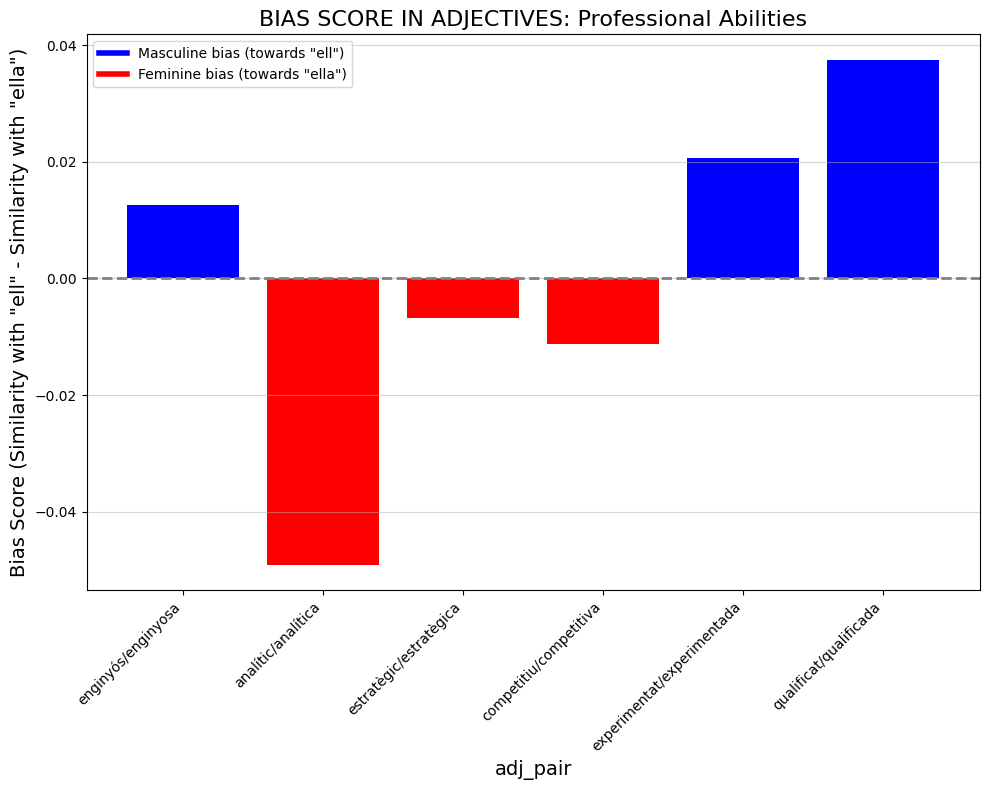

In [ ]:
# 2.1 BIAS SCORE VISUALIZATION divided into groups of adjectives


df_clean['colour'] = np.where(df_clean['bias_score'] > 0, 'blue', 'red')

for group_name, df_group in df_clean.groupby("group"):

    plt.figure(figsize=(10, 8))

    plt.bar(
        df_group['adj_pair'],
        df_group['bias_score'],
        color=df_group['colour']
    )

    # Non-bias line
    plt.axhline(0, color='grey', linestyle='--', linewidth=2)

    # Title and labels
    plt.title(f'BIAS SCORE IN ADJECTIVES: {group_name}', fontsize=16)
    plt.xlabel('adj_pair', fontsize=14)
    plt.ylabel('Bias Score (Similarity with "ell" - Similarity with "ella")', fontsize=14)

    # Rotate x-axis labels
    plt.xticks(rotation=45, ha='right')

    # Grid for easier reading
    plt.grid(axis='y', alpha=0.5)

    # Simple legend
    plt.legend(handles=[
        plt.Line2D([0], [0], color='blue', lw=4, label='Masculine bias (towards "ell")'),
        plt.Line2D([0], [0], color='red', lw=4, label='Feminine bias (towards "ella")')
    ])

    plt.tight_layout()
    plt.show()

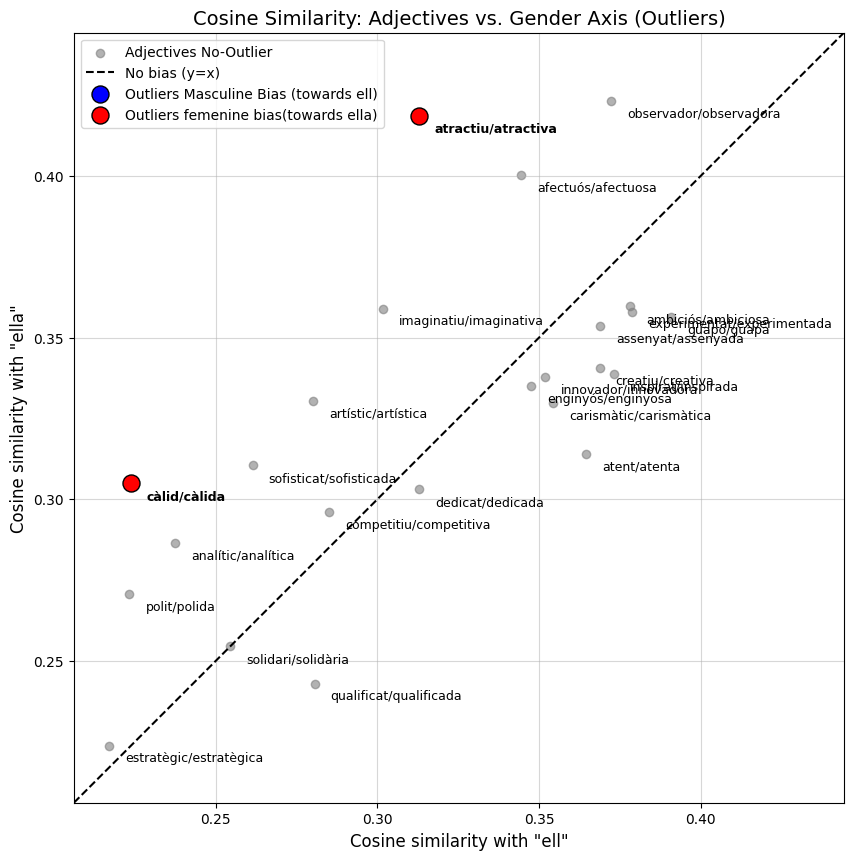

In [ ]:
# 3. SCATTER PLOT VISUALIZACIÓN WITH OUTLIERS

# Define bias threshold
threshold = 0.06

# Calculate outliers
# a) Outliers Masculine
over_estimated_outliers = df_clean[df_clean['bias_score'] > threshold].copy()

# b) Outliers Femenine
under_estimated_outliers = df_clean[df_clean['bias_score'] < -threshold].copy()

# c) No-Outliers
neutral_points = df_clean[df_clean['bias_score'].abs() <= threshold].copy()

plt.figure(figsize=(10, 10))
plt.scatter(
    neutral_points['sim_masc_ell'],
    neutral_points['sim_fem_ella'],
    color='gray',
    alpha=0.6,
    label='Adjectives No-Outlier'
)

# 2. Plot no-bias line
min_val = min(df_clean['sim_masc_ell'].min(), df_clean['sim_fem_ella'].min()) * 0.95
max_val = max(df_clean['sim_masc_ell'].max(), df_clean['sim_fem_ella'].max()) * 1.05
plt.plot(
    [min_val, max_val],
    [min_val, max_val],
    color='k',
    linestyle='--',
    label='No bias (y=x)'
)

# 3. Plot Masculine Outliers
plt.scatter(
    over_estimated_outliers['sim_masc_ell'],
    over_estimated_outliers['sim_fem_ella'],
    color='blue',
    marker='o',
    s=150,
    edgecolors='black',
    label='Outliers masculine Bias (towards ell)'
)

# 4. Plot Femenine Outliers
plt.scatter(
    under_estimated_outliers['sim_masc_ell'],
    under_estimated_outliers['sim_fem_ella'],
    color='red',
    marker='o',
    s=150,
    edgecolors='black',
    label='Outliers femenine bias(towards ella)'
)

# 5. Label points
for i, row in df_clean.iterrows():
    plt.annotate(
        row['adj_pair'],
        (row['sim_masc_ell'] + 0.005, row['sim_fem_ella'] - 0.005),
        fontsize=9,
        weight='bold' if row['adj_pair'] in over_estimated_outliers['adj_pair'].values or row['adj_pair'] in under_estimated_outliers['adj_pair'].values else 'normal'
    )

plt.title('Cosine Similarity: Adjectives vs. Gender Axis (Outliers)', fontsize=14)
plt.xlabel('Cosine similarity with "ell"', fontsize=12)
plt.ylabel('Cosine similarity with "ella"', fontsize=12)
plt.grid(True, alpha=0.5)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

plt.show()